In [1]:
# Import libraries needed to execute the code
import os
import warnings
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Import the clean data
data = pd.read_csv('source/data.csv', low_memory=False)

In [3]:
data = data.astype({
    'AccID': 'object',
    'vehicleID': 'object',
    'num_veh': 'object',
    'birth_year': 'int64',
    'age': 'int64',  
})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447658 entries, 0 to 447657
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AccID                       447658 non-null  object 
 1   day                         447658 non-null  int64  
 2   month                       447658 non-null  int64  
 3   year                        447658 non-null  int64  
 4   time                        447658 non-null  int64  
 5   lum                         447658 non-null  int64  
 6   atm_condition               447658 non-null  int64  
 7   collision_type              447658 non-null  int64  
 8   lat                         447658 non-null  float64
 9   long                        447658 non-null  float64
 10  route_category              447658 non-null  int64  
 11  traffic_regime              447658 non-null  int64  
 12  total_number_lanes          447658 non-null  int64  
 13  reserved_lane_

In [5]:
pd.set_option('display.max_columns', None)
data.head()

,AccID,day,month,year,time,lum,atm_condition,collision_type,lat,long,route_category,traffic_regime,total_number_lanes,reserved_lane_code,longitudinal_profile,upstream_terminal_number,distance_upstream_terminal,plan,surface_condition,infra,accident_situation,maximum_speed,vehicleID,num_veh,traffic_direction,vehicle_category,fixed_obstacle,mobile_obstacle,initial_impact_point,manv,motor,seat,user_category,gravity,gender,birth_year,reason_travel,safety_equipment1,age
0,201900000001,30,11,2019,5400000,4,1,2,48.896210,2.470120,1,3,10,0,1,6.0,900.0,2,1,2,1,70,138 306 524,B01,2,7,0,2,5,23,1,2,2,4,2,2002,0,1,17
1,201900000001,30,11,2019,5400000,4,1,2,48.896210,2.470120,1,3,10,0,1,6.0,900.0,2,1,2,1,70,138 306 524,B01,2,7,0,2,5,23,1,1,1,4,2,1993,5,1,26
2,201900000001,30,11,2019,5400000,4,1,2,48.896210,2.470120,1,3,10,0,1,6.0,900.0,2,1,2,1,70,138 306 525,A01,2,17,1,0,3,11,1,1,1,1,1,1959,0,1,60
3,201900000002,30,11,2019,10200000,3,1,6,48.930700,2.368800,1,1,2,0,4,3.0,845.0,2,1,0,1,70,138 306 523,A01,1,7,4,0,1,0,1,1,1,4,2,1994,0,1,25
4,201900000003,28,11,2019,54900000,1,1,4,48.935872,2.319174,1,3,8,0,1,10.0,500.0,3,1,0,1,90,138 306 520,A01,1,7,0,2,1,2,1,1,1,1,1,1996,0,1,23


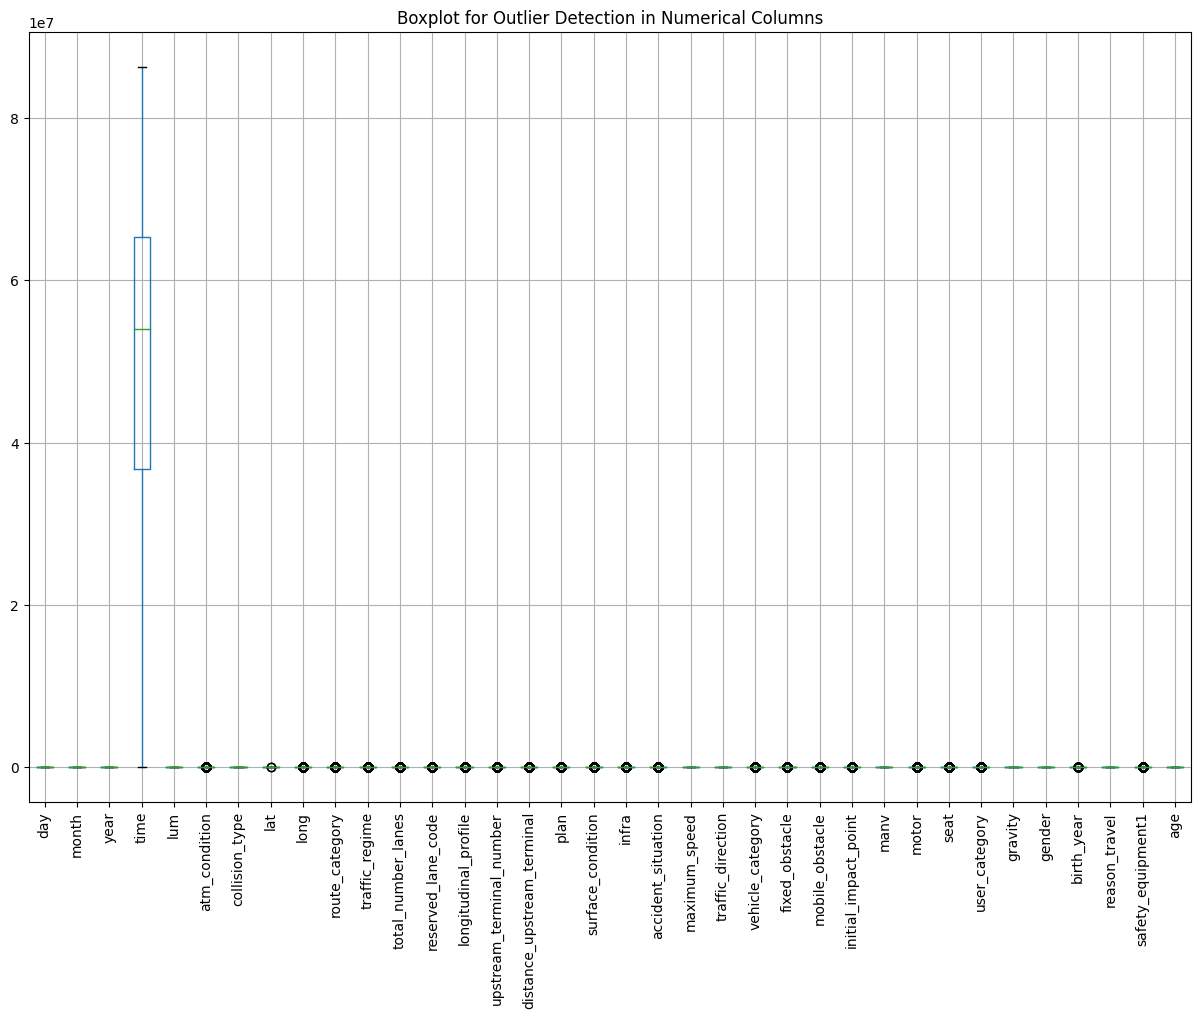

In [6]:
# Selecting numerical columns for outlier detection
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plotting box plots for numerical columns to visually inspect outliers
plt.figure(figsize=(15, 10))
data[numerical_columns].boxplot(rot=90)
plt.title('Boxplot for Outlier Detection in Numerical Columns')
plt.show()


In [7]:
# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Apply Z-score normalization to identified columns
columns_to_normalize = ['long', 'lat', 'time']
data_normalized = data.copy()
data_normalized[columns_to_normalize] = data[columns_to_normalize].apply(zscore)

# target variable
target_column = 'gravity'

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=[target_column]), data[target_column], test_size=0.3, random_state=42)

# Train a Gradient Boosting model on the original data
model_gb_original = GradientBoostingClassifier(random_state=42)
model_gb_original.fit(X_train, y_train)
y_pred_gb_original = model_gb_original.predict(X_test)
accuracy_gb_original = accuracy_score(y_test, y_pred_gb_original)

# Split the normalized data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(data_normalized.drop(columns=[target_column]), data_normalized[target_column], test_size=0.3, random_state=42)

# Train a Gradient Boosting model on the normalized data
model_gb_normalized = GradientBoostingClassifier(random_state=42)
model_gb_normalized.fit(X_train_norm, y_train_norm)
y_pred_gb_normalized = model_gb_normalized.predict(X_test_norm)
accuracy_gb_normalized = accuracy_score(y_test_norm, y_pred_gb_normalized)

print("Gradient Boosting Accuracy before normalization:", accuracy_gb_original)
print("Gradient Boosting Accuracy after normalization :", accuracy_gb_normalized)


Gradient Boosting Accuracy before normalization: 0.6711864659190755
Gradient Boosting Accuracy after normalization : 0.6711864659190755
